In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('Delivery_time.csv')
df.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [4]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

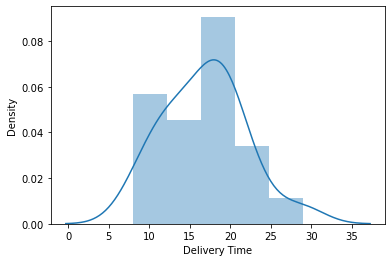

In [5]:
sns.distplot(df['Delivery Time'])

In [6]:
df['Delivery Time'].skew()

0.3523900822831107

## Applying transformation

### Root Transformation

-0.2595653540838368

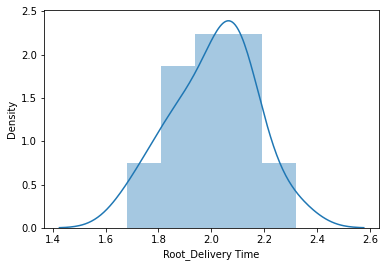

In [7]:
df['Root_Delivery Time']=df['Delivery Time']**(1/4)
sns.distplot(df['Root_Delivery Time'])
df['Root_Delivery Time'].skew()

### Log Transformation

-0.404031176142335

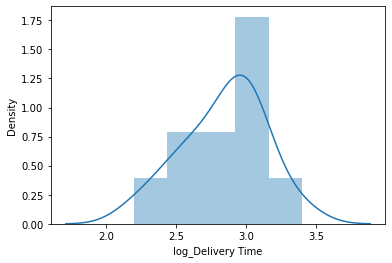

In [8]:
df['log_Delivery Time']=np.log(df['Delivery Time']+1)
sns.distplot(df['log_Delivery Time'])
df['log_Delivery Time'].skew()

### Reciprocal Transformation

1.0749789038637005

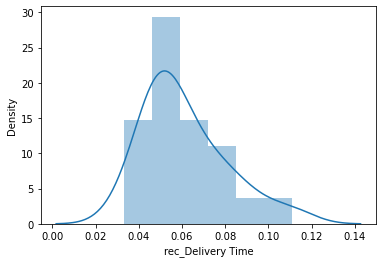

In [9]:
df['rec_Delivery Time']=1/(df['Delivery Time']+1)
sns.distplot(df['rec_Delivery Time'])
df['rec_Delivery Time'].skew()

<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

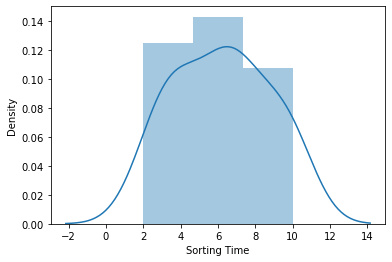

In [10]:
sns.distplot(df['Sorting Time'])

# Renaming column

In [11]:
df.columns

Index(['Delivery Time', 'Sorting Time', 'Root_Delivery Time',
       'log_Delivery Time', 'rec_Delivery Time'],
      dtype='object')

In [12]:
df=df.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
df.head()

,delivery_time,sorting_time,Root_Delivery Time,log_Delivery Time,rec_Delivery Time
0,21.00,10,2.140695,3.091042,0.045455
1,13.50,4,1.916829,2.674149,0.068966
2,19.75,6,2.108103,3.032546,0.048193
3,24.00,9,2.213364,3.218876,0.040000
4,29.00,10,2.320596,3.401197,0.033333


In [13]:
df.corr()

,delivery_time,sorting_time,Root_Delivery Time,log_Delivery Time,rec_Delivery Time
delivery_time,1.000000,0.825997,0.989493,0.983661,-0.939066
sorting_time,0.825997,1.000000,0.842260,0.843312,-0.830058
Root_Delivery Time,0.989493,0.842260,1.000000,0.999351,-0.978442
log_Delivery Time,0.983661,0.843312,0.999351,1.000000,-0.985163
rec_Delivery Time,-0.939066,-0.830058,-0.978442,-0.985163,1.000000


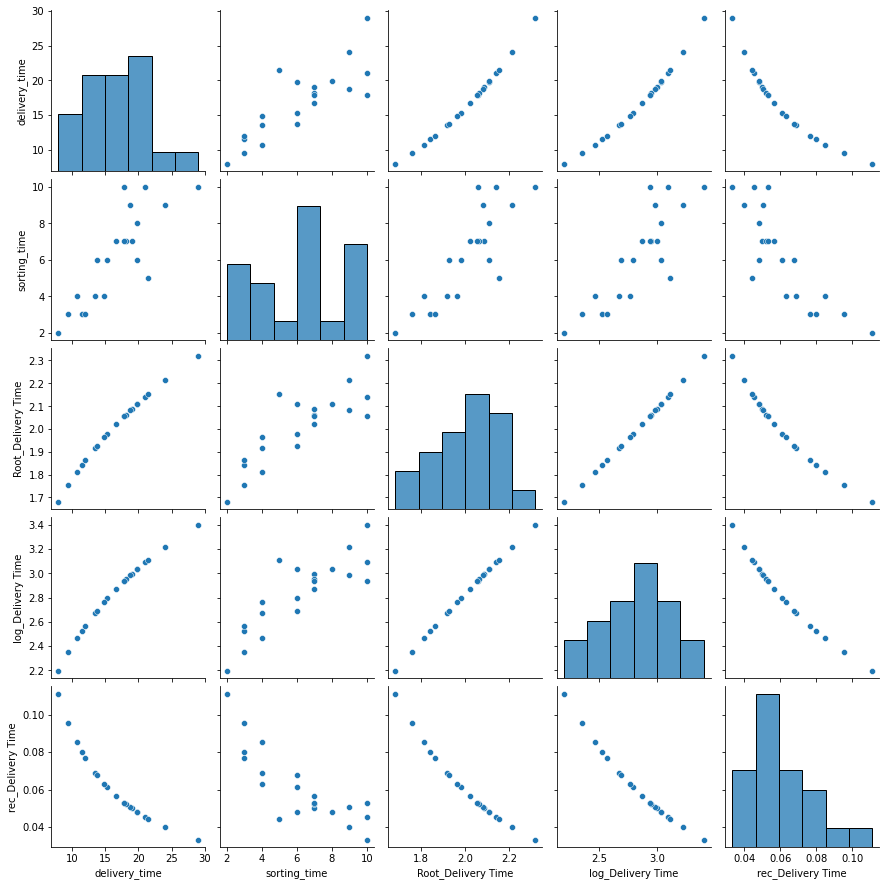

In [14]:
sns.pairplot(df)

In [15]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          delivery_time   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           3.98e-06
Time:                        21:54:34   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        6.5827      1.722      3.823      0.001       2.979      10.186
sorting_time     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

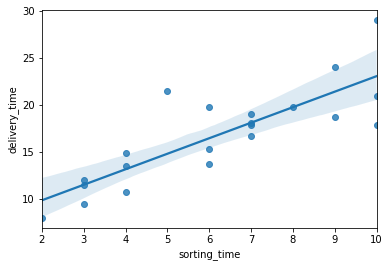

In [16]:
sns.regplot(x='sorting_time',y='delivery_time',data=df)

# Residual Analysis

In [17]:
model_diagonasis=pd.DataFrame({'Predicted_values':model.fittedvalues,'Residuals':model.resid})
model_diagonasis.head()

,Predicted_values,Residuals
0,23.072933,-2.072933
1,13.178814,0.321186
2,16.476853,3.273147
3,21.423913,2.576087
4,23.072933,5.927067


Residual Plot for Homoscedasticity

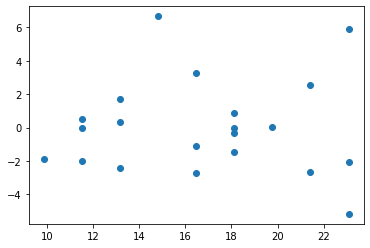

In [18]:
plt.scatter(model.fittedvalues,model.resid)

Test for Normality of Residuals

<AxesSubplot:ylabel='Density'>

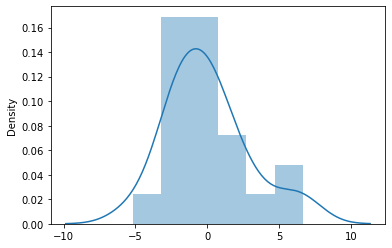

In [19]:
sns.distplot(model.resid)

In [20]:
model.resid.mean()

-6.767073673905716e-16

# Prediction

In [21]:
new_df=pd.Series([7,9])
new_df

0    7
1    9
dtype: int64

In [22]:
pred_df=pd.DataFrame(new_df,columns=['sorting_time'])
pred_df

,sorting_time
0,7
1,9


In [23]:
model.predict(pred_df)

0    18.125873
1    21.423913
dtype: float64